MSE (Custom Implementation): 9.150786500563737e-30
R-squared (Custom Implementation): 1.0


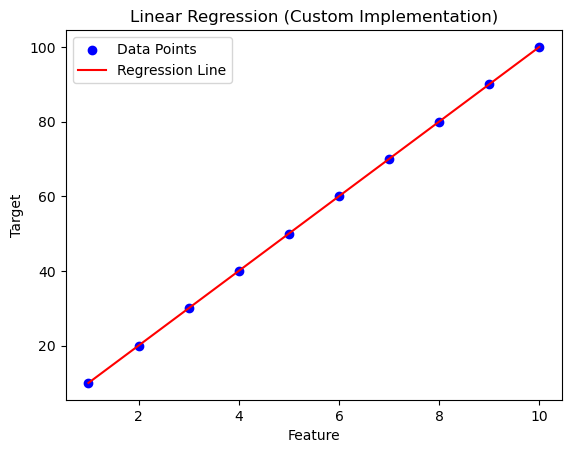

MSE (scikit-learn): 0.0
R-squared (scikit-learn): 1.0


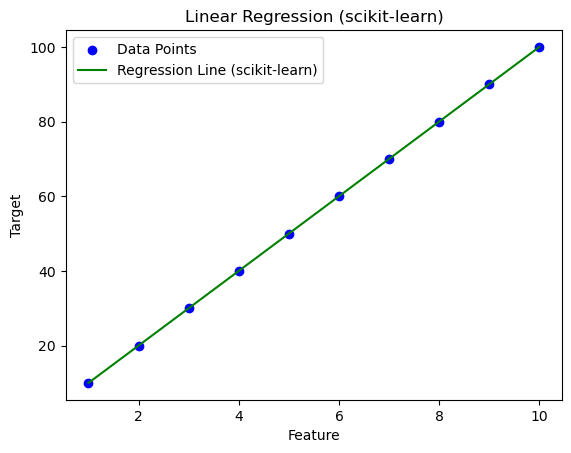

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

class SimpleLinearRegression:

    def calculate_mean(self, series):
        return sum(series) / len(series)

    def calculate_variance(self, series):
        mean = self.calculate_mean(series)
        squared_difference = [(value - mean)**2 for value in series]
        return sum(squared_difference) / (len(series) - 1)

    def calculate_covariance(self, series1, series2):
        mean1 = self.calculate_mean(series1)
        mean2 = self.calculate_mean(series2)
        return sum((series1[i] - mean1) * (series2[i] - mean2) for i in range(len(series1))) / (len(series1) - 1)

    def b1_coefficient(self, series1, series2):
        return self.calculate_covariance(series1, series2) / self.calculate_variance(series1)

    def b0_coefficient(self, series1, series2):
        return self.calculate_mean(series2) - self.b1_coefficient(series1, series2) * self.calculate_mean(series1)

    def fit(self, features, targets):
        self.b0 = self.b0_coefficient(features, targets)
        self.b1 = self.b1_coefficient(features, targets)

    def predict(self, features):
        return [self.b0 + self.b1 * x for x in features]

# Using the enhanced class
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

model = SimpleLinearRegression()
model.fit(X, Y)

predicted_y = model.predict(X)
mse = mean_squared_error(Y, predicted_y)
r2 = r2_score(Y, predicted_y)

print("MSE (Custom Implementation):", mse)
print("R-squared (Custom Implementation):", r2)

# Visualization for custom implementation
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, predicted_y, color='red', label='Regression Line')
plt.title("Linear Regression (Custom Implementation)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

# Using scikit-learn
X_np = np.array(X).reshape(-1, 1)
Y_np = np.array(Y)

model_sklearn = LinearRegression()
model_sklearn.fit(X_np, Y_np)

predicted_y_sklearn = model_sklearn.predict(X_np)
mse_sklearn = mean_squared_error(Y_np, predicted_y_sklearn)
r2_sklearn = r2_score(Y_np, predicted_y_sklearn)

print("MSE (scikit-learn):", mse_sklearn)
print("R-squared (scikit-learn):", r2_sklearn)

# Visualization for scikit-learn implementation
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, predicted_y_sklearn, color='green', label='Regression Line (scikit-learn)')
plt.title("Linear Regression (scikit-learn)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()
